In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#import the dataset
data = pd.read_csv('Ads_CTR_Optimisation.csv')
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [8]:
data.shape

(10000, 10)

In [4]:
#implement UCB
N = len(data)
d = 10
ads_selected = []
numbers_of_selections = [0]*d
sum_of_rewards = [0]*d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    for i in range(0, d):
        if(numbers_of_selections[i] > 0):
            average_reward = sum_of_rewards[i]/numbers_of_selections[i]
            delta_i = math.sqrt(3/2 * math.log(n+1)/numbers_of_selections[i])
            upper_bound = average_reward + delta_i
        
        else:
            upper_bound = 1e400
        if(upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i
        ads_selected.append(ad)
        numbers_of_selections[ad] += 1
        reward = data.values[n, ad]
        sum_of_rewards[ad] += reward
        total_reward += reward

Best ad is Ad 5


Best ad is Ad 5


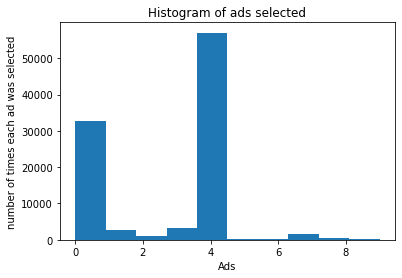

In [6]:
#visualize the results
plt.hist(ads_selected)
plt.title('Histogram of ads selected')
plt.xlabel('Ads')
plt.ylabel('number of times each ad was selected')
print('Best ad is Ad',ad+1)